### Calculate Summary Statistics for a DataFrame or Series

In [2]:
import pandas as pd

mexico_city1 = pd.read_csv("../data/mexico-city-real-estate-1.csv")
mexico_city1.head()

,property_type,department,lat-lon,area_m2,price_usd
0,house,A,"4.69,-74.048",187.0,330899.98
1,house,C,"4.695,-74.082",82.0,121555.09
2,house,A,"4.535,-75.676",235.0,219474.47
3,house,C,"4.62,-74.129",195.0,97919.38
4,house,C,"4.62,123.23",NaN,97919.38


In [7]:
mexico_city1.describe()

,area_m2,price_usd
count,4.000000,4.000000
mean,174.750000,192462.230000
std,65.301225,106240.050082
min,82.000000,97919.380000
25%,160.750000,115646.162500
50%,191.000000,170514.780000
75%,205.000000,247330.847500
max,235.000000,330899.980000


Like most large datasets, this one has many values which are missing. The describe function will ignore missing values in each column. You can also remove rows and columns with missing values, and then get a summary of the data that's still there. We need to remove columns first, before removing the rows; the sequence of operations here is important. The code looks like this:

In [4]:
mexico_city1 = mexico_city1.drop(["department"], axis=1)
mexico_city1 = mexico_city1.dropna(axis=0)
mexico_city1.head()

,property_type,lat-lon,area_m2,price_usd
0,house,"4.69,-74.048",187.0,330899.98
1,house,"4.695,-74.082",82.0,121555.09
2,house,"4.535,-75.676",235.0,219474.47
3,house,"4.62,-74.129",195.0,97919.38


In [5]:
mexico_city1.describe()

,area_m2,price_usd
count,4.000000,4.000000
mean,174.750000,192462.230000
std,65.301225,106240.050082
min,82.000000,97919.380000
25%,160.750000,115646.162500
50%,191.000000,170514.780000
75%,205.000000,247330.847500
max,235.000000,330899.980000


### Select a Series from a DataFrame

Since the datasets we work with are so large, you might want to focus on a single column of a DataFrame. Let's load up the mexico-city-real-estate-2 dataset, and examine the first few rows to find the column names.

In [9]:
mexico_city2 = pd.read_csv("../data/mexico-city-real-estate-2.csv")
mexico_city2.head()

,property_type,department,lat-lon,area_m2,price_usd
0,house,A,"4.69,-74.048",187.0,330899.98
1,house,C,"4.695,-74.082",82.0,121555.09
2,house,A,"4.535,-75.676",235.0,219474.47
3,house,C,"4.62,-74.129",195.0,97919.38
4,house,C,"4.62,123.23",NaN,97919.38


In [10]:
price = mexico_city2["price_usd"]
print(price)

0    330899.98
1    121555.09
2    219474.47
3     97919.38
4     97919.38
Name: price_usd, dtype: float64


In [9]:
mexico_city_number = mexico_city2.select_dtypes(include = "number")
mexico_city_number.head()

,area_m2,price_usd
0,187.0,330899.98
1,82.0,121555.09
2,235.0,219474.47
3,195.0,97919.38
4,NaN,97919.38


### Working with value_counts in a Series

In order to use the data in a series for other types of analysis, it might be helpful to know how often each value occurs in the Series. To do that, we use the value_counts method to aggregate the data. Let's take a look at the number of properties associated with each department in the `mexico-city-real-estate-1` dataset.

In [12]:
df1 = pd.read_csv("../data/mexico-city-real-estate-1.csv", usecols=["department"])
df1["department"].value_counts()

department
C    3
A    2
Name: count, dtype: int64

### Series and `Groupby`

Large Series often include data points that have some attribute in common, but which are nevertheless not grouped together in the dataset. Happily, pandas has a method that will bring these data points together into groups.

Let's take a look at the `mexico-city-real-estate-1` dataset. The set includes properties scattered across Colombia, so it might be useful to group properties from the same department together; to do this, we'll use the groupby method. The code looks like this

In [13]:
dept_group = df1.groupby("department")

In [14]:
dept_group.first()

""
department
A
C


Now that we have all the properties grouped by department, we might want to see the properties in just one of the departments. We can use the get_group method to do that. If we just wanted to see the properties in "A", for example, the code would look like this:

In [15]:
dept_group = df1.groupby("department")
dept_group.get_group("A")

,department
0,A
2,A


We can also make groups based on more than one category by adding them to the groupby method. After resetting the df1 DataFrame, here's what the code looks like if we want to group properties both by department and by property_type.

In [18]:
df1 = pd.read_csv("../data/mexico-city-real-estate-2.csv")
dept_group2 = df1.groupby(["department", "property_type"])
dept_group2.first()

,,lat-lon,area_m2,price_usd
department,property_type,,,
A,house,"4.69,-74.048",187.0,330899.98
C,house,"4.695,-74.082",82.0,121555.09


Finally, it's possible to use `groupby` to calculate aggregations. For example, if we wanted to find the average property area in each department, we would use the `.mean()` method. This is what the code for that looks like:

### Pivot Tables

A pivot table allows us to aggregate and summarize a DataFrame across multiple variables. For example, let's suppose we wanted to calculate the mean of the price column in the `mexico_city1` dataset for the different values in the `property_type` column:

In [20]:
import numpy as np
df = pd.read_csv('../data/mexico-city-real-estate-1.csv')
mexico_city1_pivot = df.pivot_table(values='price_usd', index = 'property_type', aggfunc = 'mean')
mexico_city1_pivot

,price_usd
property_type,
house,173553.66


### Subsetting with Masks

Another way to create subsets from a larger dataset is through masking. Masks are ways to filter out the data you're not interested in so that you can focus on the data you are. For example, we might want to look at properties in Colombia that are bigger than 200 square meters. In order to create this subset, we'll need to use a mask.

First, we'll reset our `df1` DataFrame so that we can draw on all the data in its original form. Then we'll create a statement and then assign the result to `mask`.

In [20]:
df1 = pd.read_csv("data/mexico-city-real-estate-1.csv")
mask = df1["area_m2"] > 200
mask.head()

0    False
1    False
2     True
3    False
4    False
Name: area_m2, dtype: bool

Notice that `mask` is a Series of Boolean values. Where properties are smaller than 200 square meters, our statement evaluates as `False`; where they're bigger than 200, it evaluates to `True`.

Once we have our mask, we can use it to select all the rows from `df1` that evaluate as `True`.

In [21]:
df1[mask].head()

,property_type,department,lat-lon,area_m2,price_usd
2,house,A,"4.535,-75.676",235.0,219474.47


### What's a pivot table?

A pivot table allows you to quickly aggregate and summarize a DataFrame using an aggregation function. For example, to build a pivot table that summarizes the mean of the price_cop column for each of the unique categories in the property_type column in df2:

In [21]:
import numpy as np

pivot1 = pd.pivot_table(df, values="price_usd", index="department", aggfunc=np.mean)
pivot1

/var/folders/g1/7crdd26s7g9cyx52v7z5w1_r0000gn/T/ipykernel_4903/679450356.py:3: FutureWarning: The provided callable <function mean at 0x10d5e5160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot1 = pd.pivot_table(df, values="price_usd", index="department", aggfunc=np.mean)


,price_usd
department,
A,275187.225
C,105797.950


### Combine multiple categories in a Series

Categorical variables can be collapsed into a fewer number of categories. One approach is to retain the values of the most frequently observed values and collapse all remaining values into a single category. For example, to retain only the values of the top 10 most frequent categories in the department column and then collapse the other categories together, use value_counts to generate the count of the values:

In [22]:
df1["department"].value_counts().head(3).index

Index(['C', 'A'], dtype='object', name='department')

Finally, use the apply method and a lambda function to select only the values from the department column and collapse the remaining values into the value Other:df2["department"] = df2["department"].apply(lambda x: x if x in top_10 else "Other")

In [25]:
top_3 = df1["department"].value_counts().head(1).index
df1["department"] = df1["department"].apply(lambda x: x if x in top_3 else "Other")
df1

,property_type,department,lat-lon,area_m2,price_usd
0,house,Other,"4.69,-74.048",187.0,330899.98
1,house,C,"4.695,-74.082",82.0,121555.09
2,house,Other,"4.535,-75.676",235.0,219474.47
3,house,C,"4.62,-74.129",195.0,97919.38
4,house,C,"4.62,123.23",NaN,97919.38


### Cross Tabulation

The pandas crosstab function is a useful for working with grouped summary statistics for categorical data. It starts by picking two categorical columns, then defines one as the index and the other as the column. If the aggregate function and value column is not defined, crosstab will simply calculate the frequency of each combination by default. Let's see the example below from the Colombia real estate dataset.

In [26]:
import pandas as pd

df = pd.read_csv("../data/mexico-city-real-estate-1.csv")
df.head()

,property_type,department,lat-lon,area_m2,price_usd
0,house,A,"4.69,-74.048",187.0,330899.98
1,house,C,"4.695,-74.082",82.0,121555.09
2,house,A,"4.535,-75.676",235.0,219474.47
3,house,C,"4.62,-74.129",195.0,97919.38
4,house,C,"4.62,123.23",NaN,97919.38


In [27]:
pd.crosstab(index=df["department"], columns=df["property_type"])

property_type,house
department,
A,2
C,3


In [28]:
import numpy as np

pd.crosstab(
    index=df["department"],
    columns=df["property_type"],
    values=df["area_m2"],
    aggfunc=np.mean,
).round(0)

/var/folders/g1/7crdd26s7g9cyx52v7z5w1_r0000gn/T/ipykernel_4903/3313809044.py:3: FutureWarning: The provided callable <function mean at 0x10d5e5160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(


property_type,house
department,
A,211.0
C,138.0


### Applying Functions to DataFrames and Series

`apply` is a useful method for to using one function on all the rows or columns of a DataFrame efficiently. Let's take the following real estate dataset as an example:

In [45]:
# Read data, only use the numerical columns
df = pd.read_csv("data/mexico-city-real-estate-1.csv", usecols=["area_m2", "price_usd"])
df.head()

,area_m2,price_usd
0,187.0,330899.98
1,82.0,121555.09
2,235.0,219474.47
3,195.0,97919.38
4,NaN,97919.38


In [46]:
import numpy as np

df.apply(np.sqrt)

,area_m2,price_usd
0,13.674794,575.239063
1,9.055385,348.647515
2,15.329710,468.481024
3,13.964240,312.920725
4,NaN,312.920725


In [47]:
df.apply(np.sum, axis=0)

area_m2         699.0
price_usd    867768.3
dtype: float64

In [48]:
df.apply(np.sum, axis=1)

0    331086.98
1    121637.09
2    219709.47
3     98114.38
4     97919.38
dtype: float64

### Working with Dates

### Time Stamps

Pandas' time series capabilities are built on the Timestamp class. For instance, we can transform date strings of different formats into Timestamp:

In [29]:
print(pd.Timestamp("January 8, 2022"))
print(pd.Timestamp("01/08/22 20:13"))

2022-01-08 00:00:00
2022-01-08 20:13:00


In [30]:
time_delta = pd.Timestamp("Feb. 11 2016 2:30 am") - pd.Timestamp("2015-08-03 5:14 pm")

print("time_delta type:", type(time_delta))
print(time_delta)

time_delta type: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>
191 days 09:16:00


In [31]:
import datetime

pd.Timestamp("Feb 11, 2016") - datetime.datetime(2015, 8, 3)

Timedelta('192 days 00:00:00')

In [32]:
import pandas as pd
from pandas.tseries.offsets import BDay, BMonthEnd, Day

print(pd.Timestamp("January 9, 2017") - Day(4))

2017-01-05 00:00:00


### Date Time Indices

`DatetimeIndex` is a convenient function that transforms date-like data into readable `Datetime` format for a DataFrame index. That way, we can better plot and model time series data. Let's check an example. Here we have Apple's stock prices from 1999 10 2022.

In [34]:
data = pd.read_csv("../data/stock_data.csv")
data.set_index("date", inplace=True)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2022-10-14 to 2022-10-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5 non-null      float64
 1   high    5 non-null      float64
 2   low     5 non-null      float64
 3   close   5 non-null      float64
 4   volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0+ bytes
None


,open,high,low,close,volume
date,,,,,
2022-10-14,144.31,144.52,138.1900,138.38,88492326
2022-10-13,134.99,143.59,134.3700,142.99,113223975
2022-10-12,139.13,140.36,138.1600,138.34,70433744
2022-10-11,139.90,141.35,138.2200,138.98,77033672
2022-10-10,140.42,141.89,138.5729,140.42,74899002


<Axes: xlabel='date'>

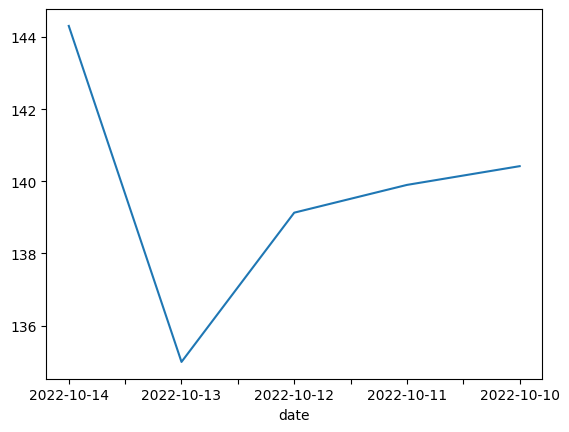

In [35]:
data["open"].plot()

In [36]:
data.index[:5]

Index(['2022-10-14', '2022-10-13', '2022-10-12', '2022-10-11', '2022-10-10'], dtype='object', name='date')

In [37]:
pd.DatetimeIndex(data.index)

DatetimeIndex(['2022-10-14', '2022-10-13', '2022-10-12', '2022-10-11',
               '2022-10-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [67]:
data.index = pd.DatetimeIndex(data.index)
data

,open,high,low,close,volume
date,,,,,
2022-10-14,144.31,144.52,138.1900,138.38,88492326
2022-10-13,134.99,143.59,134.3700,142.99,113223975
2022-10-12,139.13,140.36,138.1600,138.34,70433744
2022-10-11,139.90,141.35,138.2200,138.98,77033672
2022-10-10,140.42,141.89,138.5729,140.42,74899002


<Axes: xlabel='date'>

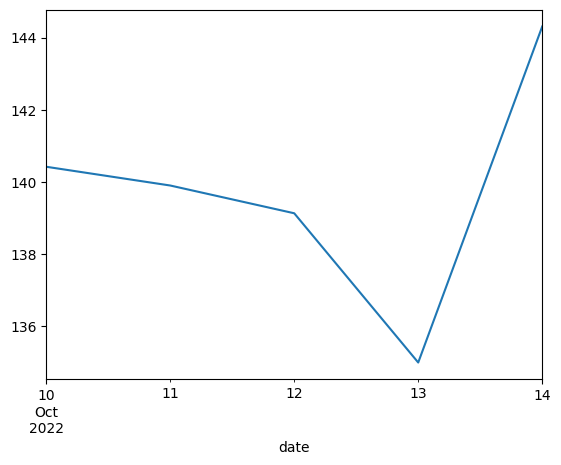

In [68]:
data["open"].plot()

### Date Ranges

If we're entering time series data into a DataFrame, it will often be useful to create a range of dates using date_range. We can create it with different frequencies by specifying freq. Here are the days in a specific range:

In [69]:
pd.date_range(start="1/8/2022", end="3/2/2022", freq="D")

DatetimeIndex(['2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02'],
              dtype='datetime64[n

Here are the business dates for a specific range:

In [70]:
pd.date_range(start="1/8/2022", end="3/2/2022", freq="B")

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01', '2022-03-02'],
              dtype='datetime64[ns]', freq='B')